## Exploratory Data Analysis: A statistical summary of Perth property values.

Dataset was generated from: https://www.kaggle.com/datasets/syuzai/perth-house-prices?resource=download

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

### Loading the data

**The line below reads the Perth House Prices csv file in the data frame.**

In [2]:
perthall = pd.read_csv("C:/Users/Creacion Tech/Documents/all_perth_310121.csv")

The line before shows the first 5 rows of the generated table.

In [3]:
perthall.head(5)

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859553,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


### Estimates and Central Tendency


The block below computes the mean, trimmmed mean and median of the measurable features in the data generated.

The measurable features include price, bedrooms, bathroom, garage, land area and floor area.

Below shows the average house prices.

In [4]:
from scipy import stats

#mean
perthall['PRICE'].mean()

637072.0057939149

In [5]:
perthall['BEDROOMS'].mean()

3.659109816971714

Below shows the average land area size.

In [6]:
perthall['LAND_AREA'].mean()

2740.6440159258377

Below shows the trimmed mean of house prices.

In [7]:
#trimmed mean
stats.trim_mean(perthall['PRICE'], 0.1)

581365.5571937904

Below shows the trimmed mean of floor area m2.

In [8]:
stats.trim_mean(perthall['FLOOR_AREA'], 0.1)

176.38665230632103

Below shows the trimmed mean of bedrooms.

In [9]:
stats.trim_mean(perthall['BEDROOMS'], 0.1)

3.6358909604100127

Below shows the trimmed mean of land area.

In [10]:
stats.trim_mean(perthall['LAND_AREA'], 0.1)

734.6741810889104

Below shows the median of house prices.

In [11]:
#median
perthall['PRICE'].median()

535500.0

Below shows the median of bedrooms.

In [12]:
perthall['BEDROOMS'].median()

4.0

Below shows the median of land area.

In [13]:
perthall['LAND_AREA'].median()

682.0

### Variability

The next block compute the estimates of variability of the Perth real estate data.

In [14]:
#standard deviation

perthall['PRICE'].std()

355825.63273659267

In [15]:
perthall['BEDROOMS'].std()

0.7520381246739782

In [16]:
perthall['FLOOR_AREA'].std()

72.10298226215527

In [17]:
perthall['LAND_AREA'].std()

16693.513214649865

In [18]:
#IQR - Interquartile Range

In [19]:
perthall['PRICE'].quantile(.25)

410000.0

In [20]:
perthall['PRICE'].quantile(.75)

760000.0

In [21]:
perthall['BEDROOMS'].quantile(.75)

4.0

In [22]:
perthall['BEDROOMS'].quantile(.50)

4.0

In [23]:
perthall['BEDROOMS'].quantile(.25)

3.0

In [24]:
perthall['PRICE'].quantile(.50)

535500.0

In [25]:
#IQR

perthall['PRICE'].quantile(.75) - perthall['PRICE'].quantile(.25)

350000.0

In [26]:
perthall['PRICE'].quantile([0.05,0.25,.50,0.75,0.95])

0.05     265000.0
0.25     410000.0
0.50     535500.0
0.75     760000.0
0.95    1375000.0
Name: PRICE, dtype: float64

## Exploring the Distribution 

### Boxplot 

The boxplot in the block below helps us visualise the distribution of variables such as price, bedrooms, floor space (and so on).

Text(0, 0.5, 'Price(Millions)')

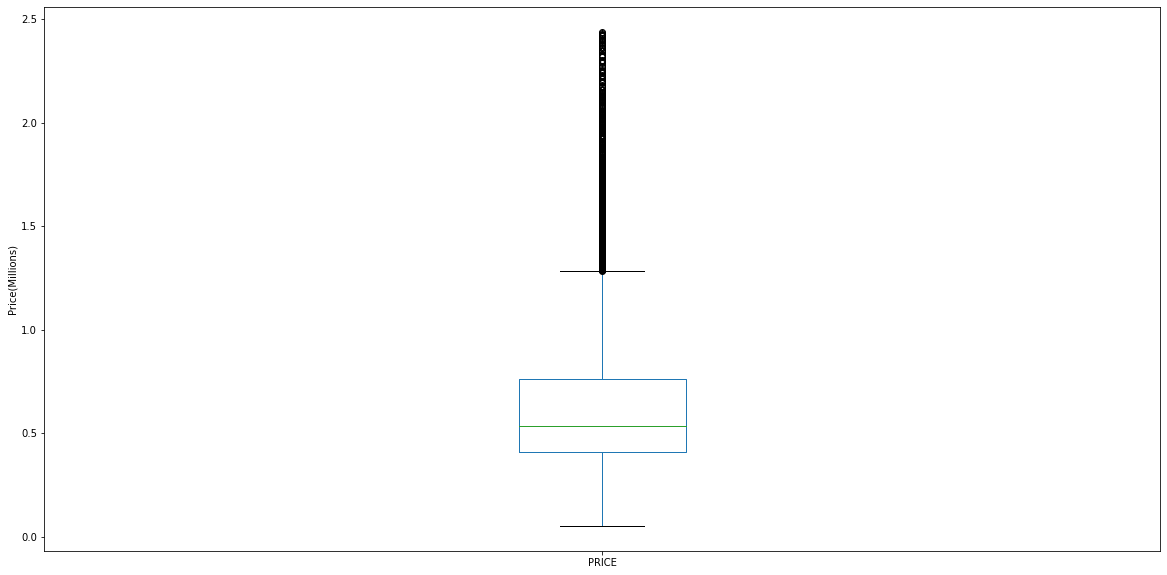

In [27]:
ax = (perthall['PRICE']/1_000_000).plot.box()
ax.set_ylabel('Price(Millions)')

In [28]:
perthall['BEDROOMS'].quantile([0.05,0.25,.50,0.75,0.95])

0.05    3.0
0.25    3.0
0.50    4.0
0.75    4.0
0.95    5.0
Name: BEDROOMS, dtype: float64

Text(0, 0.5, 'BEDROOMS')

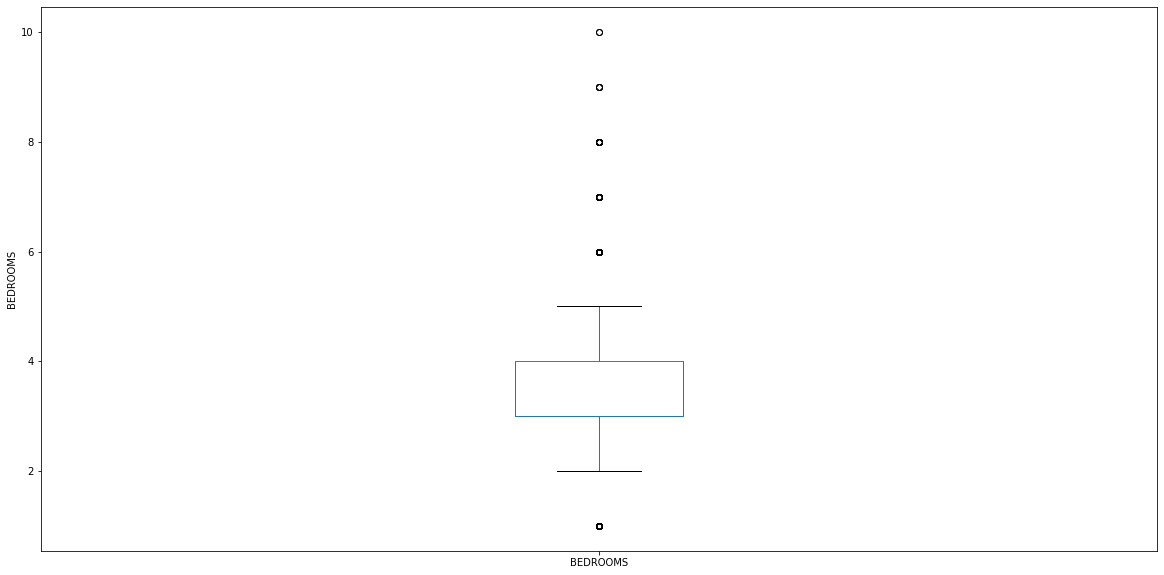

In [29]:
ax = (perthall['BEDROOMS']).plot.box()
ax.set_ylabel('BEDROOMS')

In [30]:
perthall['FLOOR_AREA'].quantile([0.05,0.25,.50,0.75,0.95])

0.05     93.00
0.25    130.00
0.50    172.00
0.75    222.25
0.95    312.25
Name: FLOOR_AREA, dtype: float64

Text(0, 0.5, 'FLOOR AREA_Square Meters')

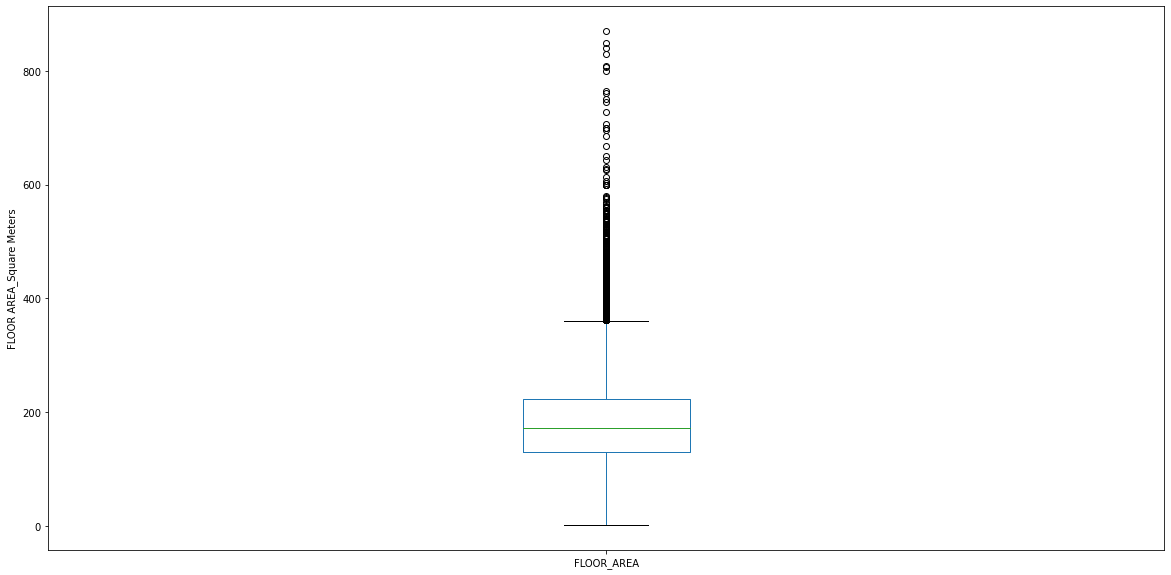

In [31]:
ax = (perthall['FLOOR_AREA']).plot.box()
ax.set_ylabel('FLOOR AREA_Square Meters')

### Frequency Table

The next block shows the frequency table of house prices.

In [32]:
binnedPrices = pd.cut(perthall['PRICE'], 10)
binnedPrices.value_counts()

(289900.0, 528800.0]      14006
(528800.0, 767700.0]       9026
(767700.0, 1006600.0]      4193
(48611.0, 289900.0]        2332
(1006600.0, 1245500.0]     1698
(1245500.0, 1484400.0]     1119
(1484400.0, 1723300.0]      593
(1723300.0, 1962200.0]      348
(1962200.0, 2201100.0]      215
(2201100.0, 2440000.0]      126
Name: PRICE, dtype: int64

### Histogram

The block below creates a histogram to help us visualize the frequency table of the data variables.

Text(0.5, 0, 'Price(millions)')

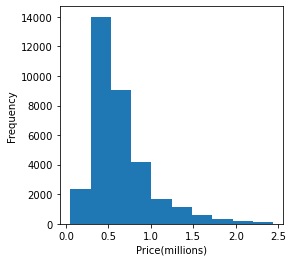

In [33]:
ax = (perthall['PRICE']/1_000_000).plot.hist(figsize=(4,4))
ax.set_xlabel('Price(millions)')

Text(0.5, 0, 'Bedrooms')

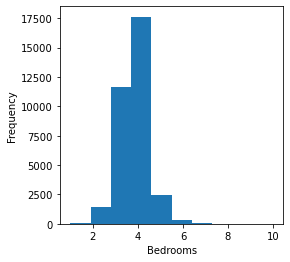

In [34]:
ax = (perthall['BEDROOMS']).plot.hist(figsize=(4,4))
ax.set_xlabel('Bedrooms')

Text(0.5, 0, 'Floor Area')

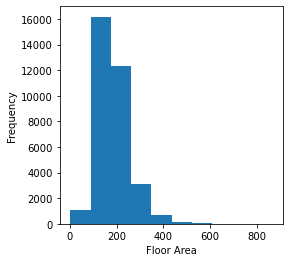

In [35]:
ax = (perthall['FLOOR_AREA']).plot.hist(figsize=(4,4))
ax.set_xlabel('Floor Area')

Text(0.5, 0, 'Bathroom')

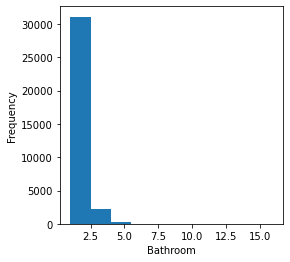

In [36]:
ax = (perthall['BATHROOMS']).plot.hist(figsize=(4,4))
ax.set_xlabel('Bathroom')

Text(0.5, 0, 'Land Area')

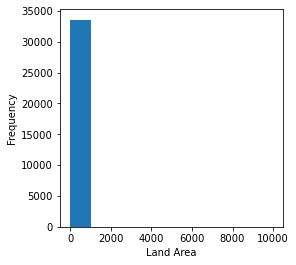

In [37]:
ax = (perthall['LAND_AREA']/100).plot.hist(figsize=(4,4))
ax.set_xlabel('Land Area')

In [38]:
perthall['LAND_AREA'].max()

999999

In [39]:
binnedPrices = pd.cut(perthall['LAND_AREA'], 10)
binnedPrices.value_counts()

(-938.938, 100054.8]    33583
(100054.8, 200048.6]       33
(200048.6, 300042.4]       23
(300042.4, 400036.2]        7
(400036.2, 500030.0]        5
(900005.2, 999999.0]        4
(500030.0, 600023.8]        1
(800011.4, 900005.2]        0
(700017.6, 800011.4]        0
(600023.8, 700017.6]        0
Name: LAND_AREA, dtype: int64

In [40]:
perthall['LAND_AREA'].quantile([0.05,0.25,.50,0.75,0.95])

0.05      296.0
0.25      503.0
0.50      682.0
0.75      838.0
0.95    12077.0
Name: LAND_AREA, dtype: float64

In [41]:
perthall.shape

(33656, 19)

## Filter Data

Pandas query() filters rows from the DataFrame with a True/False (boolean) expression. 

The block shows all the rows where PRICE is below the 75% percentile.

In [42]:
perthall.query('PRICE < PRICE.quantile(.75)')

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859553,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33649,9B Viveash Road,Middle Swan,467000,4,2,2.0,400,132,2014.0,17100,Midland Station,2500,04-2015\r,6056,-31.872192,116.013543,LA SALLE COLLEGE,1.116806,53.0
33652,9C Pycombe Way,Westminster,410000,3,2,2.0,228,114,NaN,9600,Stirling Station,4600,02-2017\r,6061,-31.867055,115.841403,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.679644,35.0
33653,9D Pycombe Way,Westminster,427000,3,2,2.0,261,112,NaN,9600,Stirling Station,4600,02-2017\r,6061,-31.866890,115.841418,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.669159,35.0
33654,9D Shalford Way,Girrawheen,295000,3,1,2.0,457,85,1974.0,12600,Warwick Station,4400,10-2016\r,6064,-31.839680,115.842410,GIRRAWHEEN SENIOR HIGH SCHOOL,0.358494,NaN


In [43]:
perthall75belowPrice = perthall.query('PRICE < PRICE.quantile(.75)')

In [44]:
perthall75belowPrice.shape

(25123, 19)

In [45]:
perthall75belowPrice.head(5)

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859553,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [46]:
perthall75belowPrice.describe()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
count,25123.000000,25123.000000,25123.000000,23194.000000,25123.000000,25123.000000,22689.000000,25123.000000,25123.000000,25123.000000,25123.000000,25123.000000,25123.000000,15568.000000
mean,472549.462166,3.575369,1.724117,2.103906,1999.438124,164.185686,1991.672220,21710.696254,4759.490347,6094.187796,-31.963632,115.890455,1.821015,83.946814
std,141334.040483,0.702618,0.523504,1.249250,15064.789225,56.384066,18.255833,11290.429612,4676.375859,61.602612,0.192252,0.121121,1.757318,36.132668
min,51000.000000,1.000000,1.000000,1.000000,61.000000,1.000000,1880.000000,681.000000,46.000000,6003.000000,-32.472979,115.583610,0.070912,1.000000
25%,375000.000000,3.000000,1.000000,2.000000,501.000000,122.000000,1980.000000,13100.000000,1800.000000,6055.000000,-32.100529,115.798586,0.882080,53.000000
50%,470000.000000,4.000000,2.000000,2.000000,663.000000,156.000000,1996.000000,19700.000000,3400.000000,6073.000000,-31.917970,115.868240,1.348841,91.000000
75%,575000.000000,4.000000,2.000000,2.000000,802.000000,200.000000,2006.000000,27900.000000,5700.000000,6148.000000,-31.826313,115.984217,2.123375,114.000000
max,759000.000000,10.000000,16.000000,99.000000,999999.000000,840.000000,2017.000000,59800.000000,35500.000000,6558.000000,-31.465818,116.341780,19.406233,139.000000


In [47]:
perthall.describe()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
count,3.365600e+04,33656.000000,33656.000000,31178.000000,33656.000000,33656.000000,30501.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,22704.000000
mean,6.370720e+05,3.659110,1.823063,2.199917,2740.644016,183.501545,1989.706436,19777.374465,4523.371494,6089.420074,-31.960664,115.879265,1.815268,72.672569
std,3.558256e+05,0.752038,0.587427,1.365225,16693.513215,72.102982,20.964330,11364.415413,4495.064024,62.167921,0.177780,0.118137,1.746000,40.639795
min,5.100000e+04,1.000000,1.000000,1.000000,61.000000,1.000000,1868.000000,681.000000,46.000000,6003.000000,-32.472979,115.582730,0.070912,1.000000
25%,4.100000e+05,3.000000,1.000000,2.000000,503.000000,130.000000,1978.000000,11200.000000,1800.000000,6050.000000,-32.068437,115.789763,0.880568,39.000000
50%,5.355000e+05,4.000000,2.000000,2.000000,682.000000,172.000000,1995.000000,17500.000000,3200.000000,6069.000000,-31.933231,115.854198,1.345520,68.000000
75%,7.600000e+05,4.000000,2.000000,2.000000,838.000000,222.250000,2005.000000,26600.000000,5300.000000,6150.000000,-31.843818,115.970722,2.097225,105.000000
max,2.440000e+06,10.000000,16.000000,99.000000,999999.000000,870.000000,2017.000000,59800.000000,35500.000000,6558.000000,-31.457450,116.343201,23.254372,139.000000


## Examining Correlation among variables.

The block shows a correlation table of all the predictors and target variable(price).

In [48]:
perthall.corr()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
PRICE,1.000000,0.252637,0.377133,0.134343,0.056855,0.548497,-0.157218,-0.354327,-0.095089,-0.171553,0.053041,-0.183734,-0.021941,-0.461991
BEDROOMS,0.252637,1.000000,0.555702,0.194197,0.051223,0.536926,0.229019,0.124654,0.102203,0.010601,0.021967,-0.015170,0.092391,0.024461
BATHROOMS,0.377133,0.555702,1.000000,0.186801,0.027059,0.555843,0.339594,0.033053,0.037068,-0.041374,0.051411,-0.093817,0.060734,-0.096024
GARAGE,0.134343,0.194197,0.186801,1.000000,0.059211,0.201541,0.040371,0.046244,0.110527,0.028005,-0.016416,0.091270,0.099654,0.021863
LAND_AREA,0.056855,0.051223,0.027059,0.059211,1.000000,0.073836,0.002063,0.133262,0.233023,0.042070,-0.014389,0.151255,0.286964,0.048758
FLOOR_AREA,0.548497,0.536926,0.555843,0.201541,0.073836,1.000000,0.226872,0.022687,0.106527,-0.050658,0.043555,-0.046625,0.120048,-0.145502
BUILD_YEAR,-0.157218,0.229019,0.339594,0.040371,0.002063,0.226872,1.000000,0.270110,0.103350,0.044095,0.045463,-0.059047,0.108719,0.158639
CBD_DIST,-0.354327,0.124654,0.033053,0.046244,0.133262,0.022687,0.270110,1.000000,0.446496,0.255801,-0.196813,-0.060097,0.377118,0.328703
NEAREST_STN_DIST,-0.095089,0.102203,0.037068,0.110527,0.233023,0.106527,0.103350,0.446496,1.000000,0.204347,0.037174,0.496924,0.634712,0.189571
POSTCODE,-0.171553,0.010601,-0.041374,0.028005,0.042070,-0.050658,0.044095,0.255801,0.204347,1.000000,-0.642643,0.173918,0.128424,0.192768


Below is a ___Correlation Matrix___ of housing data.

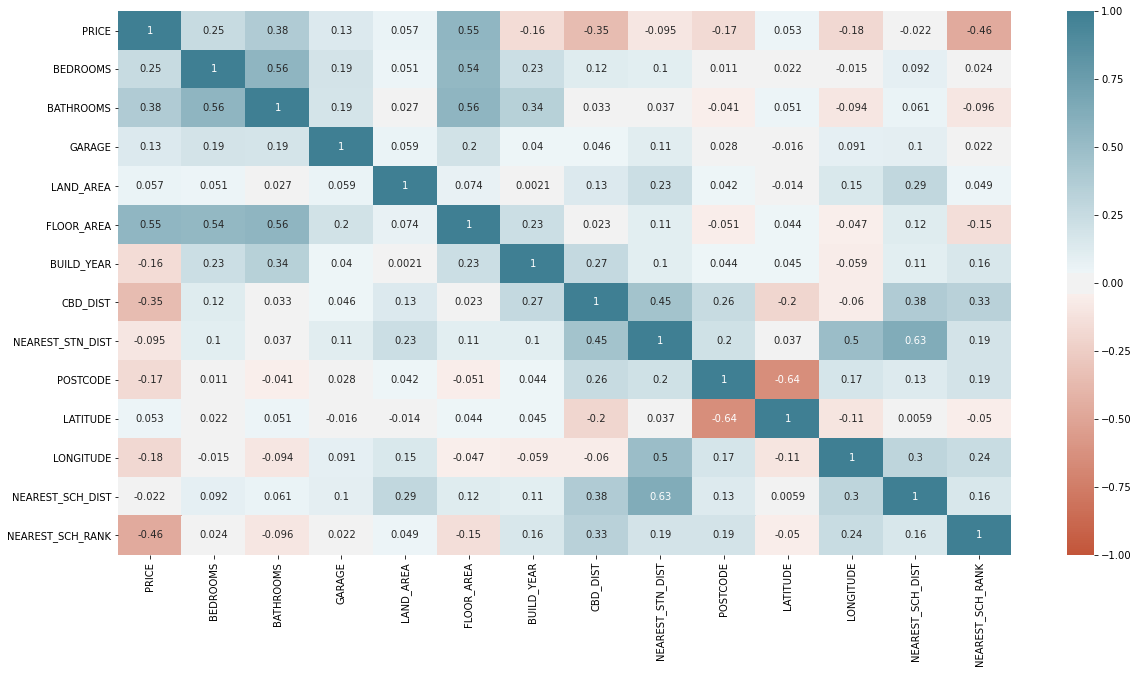

In [49]:
sns.heatmap(perthall.corr(),vmin=-1,vmax=1, annot=True, cmap=sns.diverging_palette(20,220, as_cmap=True))

## Scatterplots

A scatterplot of the correlation between Price and Floor Area

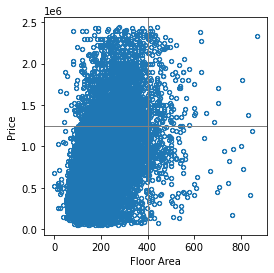

In [50]:
ax = perthall.plot.scatter(x='FLOOR_AREA', y="PRICE", figsize=(4,4), marker='$\u25EF$')
ax.set_xlabel('Floor Area')
ax.set_ylabel('Price')
ax.axhline(1250000, color='grey',lw=1)
ax.axvline(400, color='grey',lw=1)

Compute a hexagonal binning plot to properly visualize the relationship between Price and Floor Area, because the scatterplot is too dense for data in thousands like the real estate dataset. 

Text(0, 0.5, 'Price')

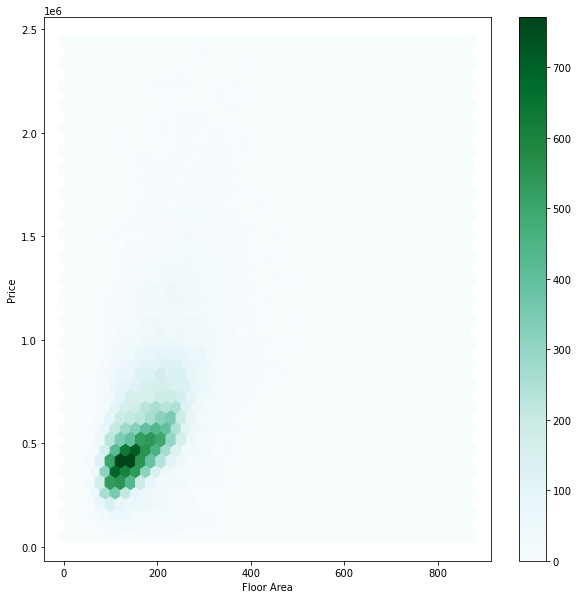

In [51]:
ax = perthall.plot.hexbin(x='FLOOR_AREA', y="PRICE", gridsize=40,sharex=False, figsize=(10,10))
ax.set_xlabel('Floor Area')
ax.set_ylabel('Price')

A Simple Pivot Table of Suburb and price, floor area and bedrooms in median values.

In [52]:
pivottable = pd.pivot_table(perthall, values=['PRICE','FLOOR_AREA','BEDROOMS'], index=['SUBURB'], aggfunc={'PRICE':np.median,'FLOOR_AREA':np.median,'BEDROOMS':np.median})
pivottable = pivottable.sort_values(by = 'PRICE', ascending = False)
pivottable.style.background_gradient(cmap = 'cubehelix')

,BEDROOMS,FLOOR_AREA,PRICE
SUBURB,,,
Dalkeith,4.000000,260.000000,2039000.000000
Peppermint Grove,4.000000,220.000000,1965000.000000
Cottesloe,3.000000,183.000000,1690000.000000
Nedlands,4.000000,213.000000,1667500.000000
City Beach,4.000000,259.500000,1650000.000000
Swanbourne,4.000000,227.000000,1550000.000000
Floreat,4.000000,225.000000,1475000.000000
Naval Base,3.000000,558.000000,1408000.000000
Wangara,2.000000,830.000000,1375000.000000
